# ---- CHIEN - CHAT ----
___ 

*Par Romain Dore, Julian Samitier et Florian Duzes*

L'objectif de ce projet est de developper un IA capable de distinguer un **chat** d'un **chien**. <br>
Une seule contrainte :
- la database est unique

# Chargement des données

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.decomposition import PCA, IncrementalPCA

Mettons une graine pour fixer l'aleatoire.

In [2]:
np.random.seed(0)

Chargeons nos fichiers de travail

In [40]:
%run util.ipynb
%run modulePerceptron.ipynb
%run moduleACP.ipynb

In [4]:
#On charge les training data et des test data avant des les exploiter
from utilities import *
X, y_train, Xtest, y_test = premiere_donnees()

On a 1000 photos de 64 x 64 pixels <br>
*500 photos de chats, 500 photos de chiens* <br>
Elles constituront notre base d'apprentissage. Nous avons une reserve de 200 images pour effectuer les test. 

/home/florian/.local/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


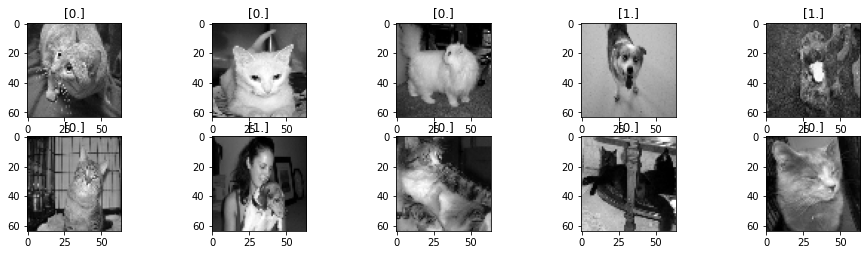

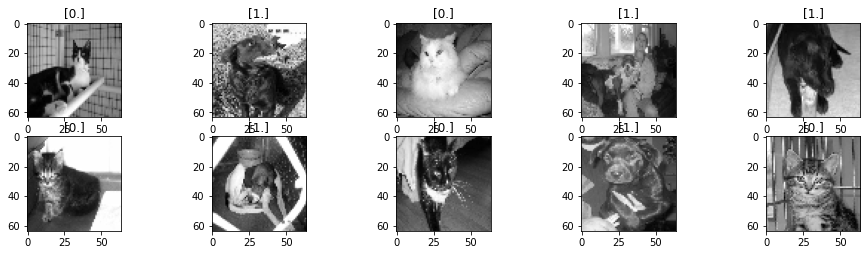

In [5]:
#On affiche quelques photos pour voir que ce sont bien des chats et chiens
affichage(10,X,y_train)
affichage(10,Xtest,y_test)

___
# Premiere approche - Perceptron 
___

La premiere etape consiste a aplatir les images.<br>
Ainsi, chaque image deviendra un vecteur.

In [5]:
Xr = aplatit(X)
Xtr = aplatit(Xtest)

Ici, nos variables sont comprises entre 0 et 255  (nos images sont composes d'une unique couleur). <br>
On va reduire le donnes pour faciliter les calculs

In [6]:
X_train = Xr/255
X_test = Xtr/255

In [7]:
W_initial,b_initial = initParam(X_train.shape[1])

#### Notre perceptron a tous ses parametres, desormais nous allons l'entrainer

In [8]:
param_perceptron = ['log_loss','erreur_quadratique']

In [9]:
W,b = module_perceptron(W_initial,
                        b_initial, 
                        X_train,y_train,
                        param_perceptron[1])

Observons un premier resultat

In [13]:
print("Test sur Donnees d'aprentissage :",accuracy_score(y_train,predict(X_train,W,b)))
print("Test sur Donnees de test :",accuracy_score(y_test,predict(X_test,W,b)))

Test sur Donnees d'aprentissage : 0.5
Test sur Donnees de test : 0.5


Observons desormais l'effet du log_loss comme correcteur d'erreur

In [14]:
W,b = module_perceptron(W_initial,
                        b_initial, 
                        X_train,y_train,
                        param_perceptron[0])

In [15]:
print("Test sur Donnees d'aprentissage :",accuracy_score(y_train,predict(X_train,W,b)))
print("Test sur Donnees de test :",accuracy_score(y_test,predict(X_test,W,b)))

Test sur Donnees d'aprentissage : 0.534
Test sur Donnees de test : 0.545


Faisons jouer les parametres !

MAXIMISATION DE LA VRAISSEMBLANCE


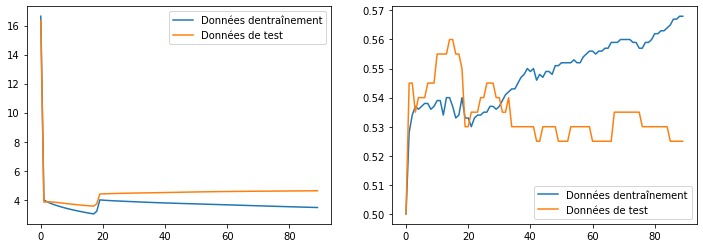

Meilleure résultat sur les Données d entrainement : 0.568
Meilleure résultat sur les Données de test : 0.56


In [10]:
affichage_iter(1000,
               W_initial,
               b_initial, 
               param_perceptron[0],
               X_train,y_train,X_test,y_test)

REDUCTION DE L'ERREUR QUADRATIQUE


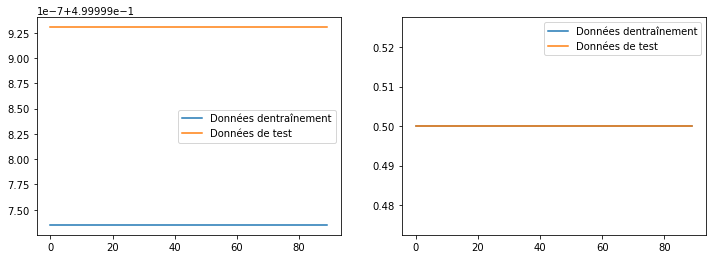

Meilleure résultat sur les Données d entrainement : 0.5
Meilleure résultat sur les Données de test : 0.5


In [11]:
affichage_iter(1000,
               W_initial,
               b_initial, 
               param_perceptron[1],
               X_train,y_train,X_test,y_test)

On n'est pas satisfait de ce qui est produit par un unique neurone.
En utilisant un lancer de piece, on pourrait faire mieux...

___
# Deuxieme approche - Reseau de neurone 
___

Utilisons un MLPClassifier

In [47]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(2,),
                    activation='identity',
                    solver='adam',
                    max_iter=5000,
                    random_state=100)

In [48]:
clf.fit(X_train, y_train.ravel())
print("Matrice de poids entrées -> couche cachée : {}".format(clf.coefs_[0].shape))
print("Matrice de poids couche cachée -> sorties : {}".format(clf.coefs_[1].shape))

Matrice de poids entrées -> couche cachée : (4096, 2)
Matrice de poids couche cachée -> sorties : (2, 1)


In [49]:
train_score = clf.score(X_train, y_train)
print("Le score en train est {}".format(train_score))
test_score = clf.score(X_test, y_test)
print("Le score en test est {}".format(test_score))

Le score en train est 0.942
Le score en test est 0.54


On observe que le modele c'est super bien entraine, par contre, une fois sur le terrain, il se casse les dents.

In [19]:
parameters = {
    'hidden_layer_sizes' : (2,),
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha' : [0.01, 0.0001],# default = 0.0001
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [400, 800] ,# default = 200
    'verbose' : [False]
}

In [20]:
gridSearch = GSCV(clf, parameters, verbose=2, return_train_score=True)
gridSearch.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.9s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.9s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.7s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   1.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.5s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   1.5s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.7s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   1.3s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   1.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   1.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.7s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   1.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   6.0s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   5.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   5.0s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   5.3s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   6.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   1.9s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   4.8s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   1.4s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   2.7s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, sol

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   1.4s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.9s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   1.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.9s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.8s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   1.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.7s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling,

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   3.0s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   1.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   3.3s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   1.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   3.2s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   1.2s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   1.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.9s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   1.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   5.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   5.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   5.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   6.1s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   6.0s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   1.7s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   5.4s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   3.1s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   1.5s
[CV] END activation=identity, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   2.8s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, sol

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   3.1s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   2.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   1.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.8s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   1.4s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.4s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   5.0s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   5.0s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   4.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   5.2s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, verbose=False; total time=   6.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   1.9s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   5.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   2.7s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   1.4s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_ra

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.5s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.5s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.5s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   2.8s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   1.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   1.5s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   3.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.4s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   5.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   5.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   5.1s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   5.5s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, verbose=False; total time=   5.8s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   1.7s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   4.9s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   2.9s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   2.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_ite

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   2.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solv

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   2.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   2.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solv

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   2.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   2.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=in

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   2.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   2.2s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total ti

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   2.2s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=F

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   2.2s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total ti

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=sgd, verbose=

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=sgd, verbose=False; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   2.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=False; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=sgd, verbose=

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   3.2s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False;

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   5.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   3.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   2.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.7s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, 

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=adam, verbose=False; total time=   5.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=adam, verbose=False; total time=   3.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=adam, verbose=False; total time=   2.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=F

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   3.5s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   3.3s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   3.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False;

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   5.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   3.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=lbfgs, verbose

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.6s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=400, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=sgd, v

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   6.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=constant, max_iter=800, solver=adam, verbose=False; total time=   3.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   3.3s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   3.0s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   3.0s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=400, solver=adam, verbose=False; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800,

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=adam, verbose=False; total time=   6.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=adam, verbose=False; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=invscaling, max_iter=800, solver=adam, verbose=False; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lbfgs, verbose=False; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=lb

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   3.0s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.9s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.8s


/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=400, solver=adam, verbose=False; total time=   2.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=lbfgs, verbose=False; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=sgd, v

/home/florian/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   5.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   3.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=2, learning_rate=adaptive, max_iter=800, solver=adam, verbose=False; total time=   3.3s


GridSearchCV(estimator=MLPClassifier(activation='identity',
                                     hidden_layer_sizes=(2,), max_iter=5000,
                                     random_state=100),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.01, 0.0001], 'hidden_layer_sizes': (2,),
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [400, 800],
                         'solver': ['lbfgs', 'sgd', 'adam'],
                         'verbose': [False]},
             return_train_score=True, verbose=2)

In [22]:
print('meilleurs parametres :', gridSearch.best_params_)
print('meilleurs score :', gridSearch.best_score_)

meilleurs parametres : {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 2, 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'lbfgs', 'verbose': False}
meilleurs score : 0.5529999999999999


In [24]:
res = pd.DataFrame(gridSearch.cv_results_)
print(res.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.852123      0.111528         0.001064        0.000042   
1       2.616397      0.073105         0.001258        0.000080   
2       2.180536      0.606131         0.001254        0.000107   
3       0.889979      0.124451         0.000988        0.000014   
4       5.587791      0.369694         0.001452        0.000305   

  param_activation param_alpha param_hidden_layer_sizes param_learning_rate  \
0         identity        0.01                        2            constant   
1         identity        0.01                        2            constant   
2         identity        0.01                        2            constant   
3         identity        0.01                        2            constant   
4         identity        0.01                        2            constant   

  param_max_iter param_solver  ... mean_test_score std_test_score  \
0            400        lbfgs  ...           0.522   

Notre premier perceptron en LogLoss nous apportais un résultat à **54,5%**, voir **56%** si on améliore nos poids, et ici on pousse jusqu'à **55,3%**.

Ce résultat ne nous satisfait pas, essayons de réduire le nombre de variable avec une ACP.
___
# Troisieme approche - ACP
___

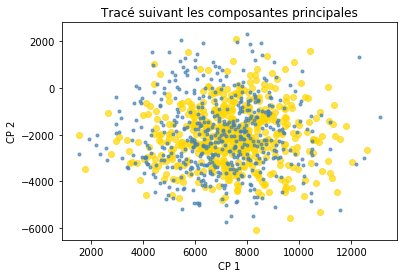

In [15]:
observation()

Inertie du plan principal =  (31.277735599856143+0j) %
Inertie avec 100 = (85.38321115306914+0j) %


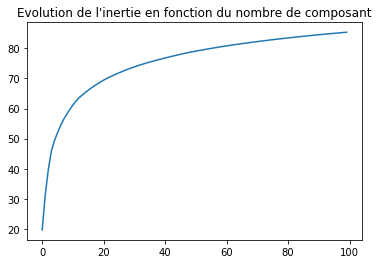

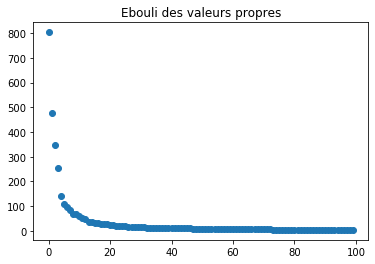

In [26]:
valeurs_propres = acp_premier(100)

Avec seulement les 100 premiers composants, on est à plus de 85% de similitude (100 pour le vecteur, soit 10 pour l'image). Observons comment cela rend.

In [41]:
image_alleg = acp_second(X,10)

/usr/lib/python3/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


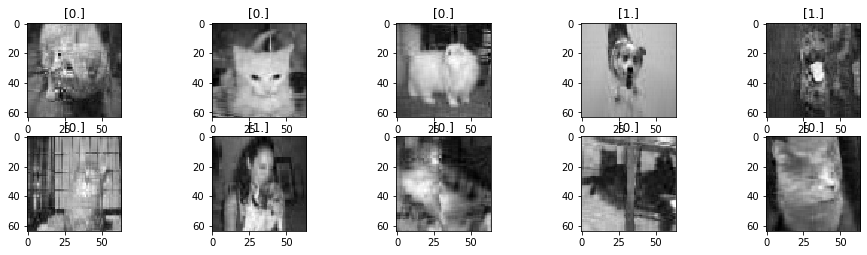

In [42]:
affichage(10,image_alleg,y_train)

Relançons une analyse.

In [46]:
Xnr = aplatit(np.array(image_alleg))

Réutilisons les paramètres qui semblait meilleurs lors de notre étude précédentes.

In [51]:
clf = MLPClassifier(hidden_layer_sizes=(2,),
                    activation='tanh',
                    learning_rate = 'constant',
                    alpha = 0.0001,
                    solver='lbfgs',
                    max_iter=400,
                    random_state=100)

In [52]:
clf.fit(Xnr, y_train.ravel())
train_score = clf.score(X_train, y_train)
print("Le score en train est {}".format(train_score))
test_score = clf.score(X_test, y_test)
print("Le score en test est {}".format(test_score))

Le score en train est 0.502
Le score en test est 0.49


MAXIMISATION DE LA VRAISSEMBLANCE


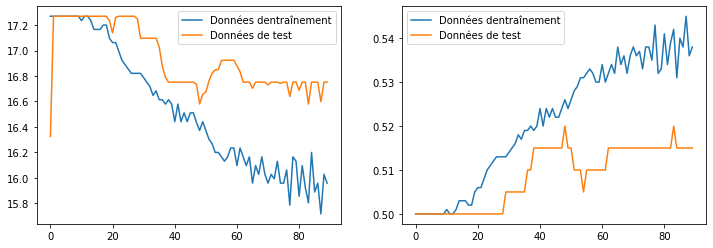

Meilleure résultat sur les Données d entrainement : 0.545
Meilleure résultat sur les Données de test : 0.52


In [55]:
import warnings #problème de calcul avec l'ordinateur de la région, alors on cache les alertes
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    affichage_iter(1000,
               W_initial,
               b_initial, 
               param_perceptron[0],
               Xnr,y_train,X_test,y_test)

___
# Conclusion
___

On observe, après plusieurs tentatives, que notre classificateur n'est pas efficace. <br>
Il ne se dégage aucune solution nous permettant d'améliorer le modèle. <br>
- Il est surement nécessaire d'augmenter la taille de la base données. Le nombre de variables, face à la justesse du jeu d'entrainement peut être une cause de ce cantonement à 50%.

Essayons une augmentation simple de la database.

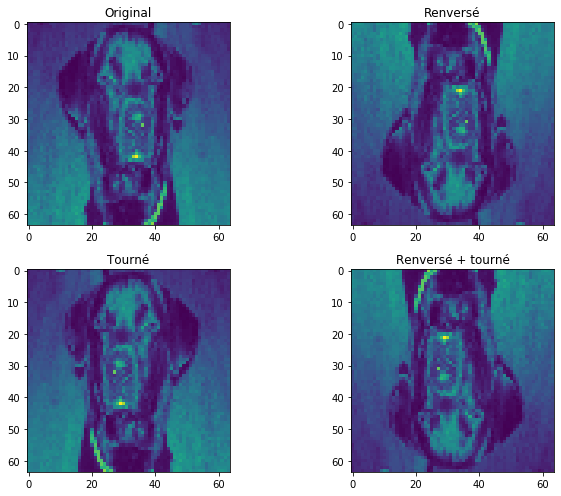

In [78]:
img = X[63]

figure = plt.figure(tight_layout='auto', figsize=(10, 7))
figure.add_subplot(221)
plt.title('Original')
plt.imshow(img)

up_down = np.flipud(img)
figure.add_subplot(222)
plt.title('Renversé')
plt.imshow(up_down, cmap = None)


mirroir = np.fliplr(img)
figure.add_subplot(223)
plt.title('Tourné')
plt.imshow(mirroir, cmap = None)

mirroir2 = np.fliplr(up_down)
figure.add_subplot(224)
plt.title('Renversé + tourné')
plt.imshow(mirroir2, cmap = None)

plt.show()

In [84]:
X_augmente = []
y_augmente = []


for image in range(len(X)):
    X_augmente.append(X[image])
    y_augmente.append(y_train[image])
    
    X_augmente.append(np.flipud(X[image]))
    y_augmente.append(y_train[image])
    
    X_augmente.append(np.fliplr(X[image]))
    y_augmente.append(y_train[image])
    
    X_augmente.append(np.fliplr(np.flipud(X[image])))
    y_augmente.append(y_train[image])

In [93]:
len(X_augmente)

4000

Est-ce que c'est mieux ?

In [86]:
Xar = aplatit(np.array(X_augmente))
Xa_train = Xar/255

ya = np.array(y_augmente)

MAXIMISATION DE LA VRAISSEMBLANCE


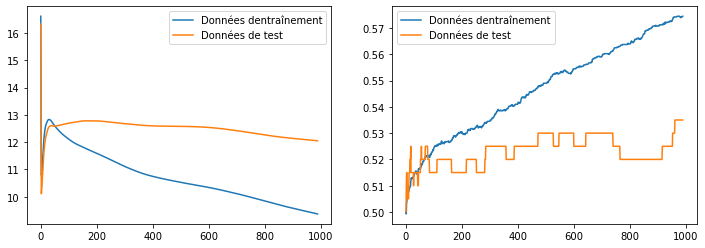

Meilleure résultat sur les Données d entrainement : 0.5745
Meilleure résultat sur les Données de test : 0.535


In [89]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    affichage_iter(10000,
               W_initial,
               b_initial, 
               param_perceptron[0],
               Xa_train,ya,X_test,y_test)

Pas tellement...

In [94]:
clf.fit(Xa_train, ya.ravel())
train_score = clf.score(X_train, y_train)
print("Le score en train est {}".format(train_score))
test_score = clf.score(X_test, y_test)
print("Le score en test est {}".format(test_score))

Le score en train est 0.772
Le score en test est 0.57


Mais ici on a pris 2% de plus. Il semble que cela soit une piste à explorer.